
=== RUNNING ALL CLUSTERING METHODS ===

K-means Evaluation:
Adjusted Rand Index: -0.0022
Normalized Mutual Information: 0.0042

Contingency Table:
col_0          0    1    2    3
player_type                    
Activist     244  622  563  327
Pragmatist    62  297  203  108
Reflector    129  275  214  144
Theorist     326  592  538  358
Cluster Purity: 0.3737

=== HIERARCHICAL CLUSTERING ===


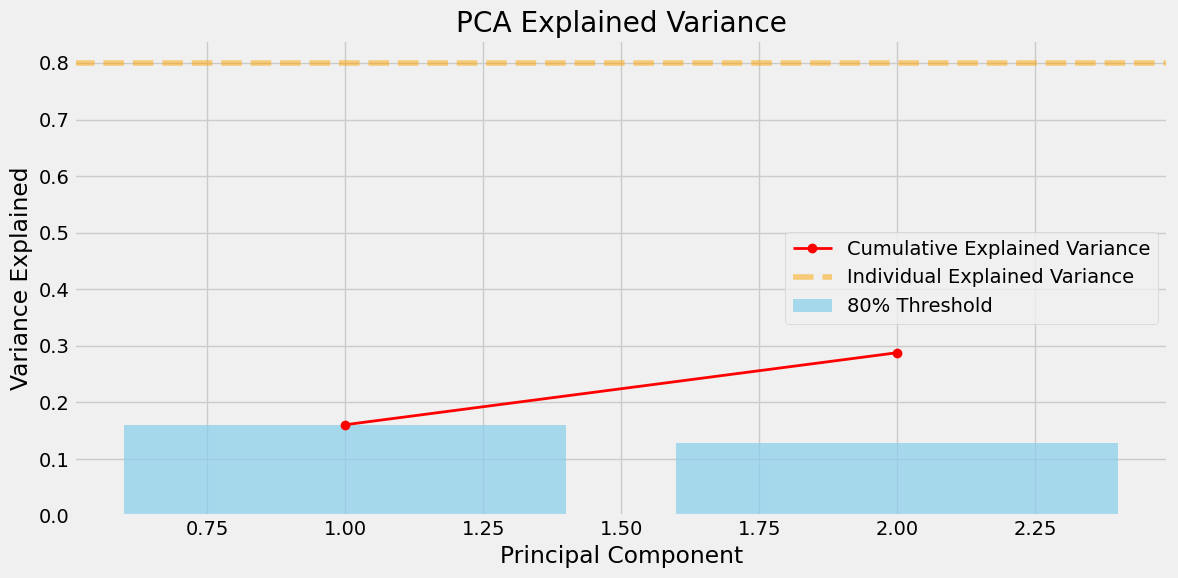

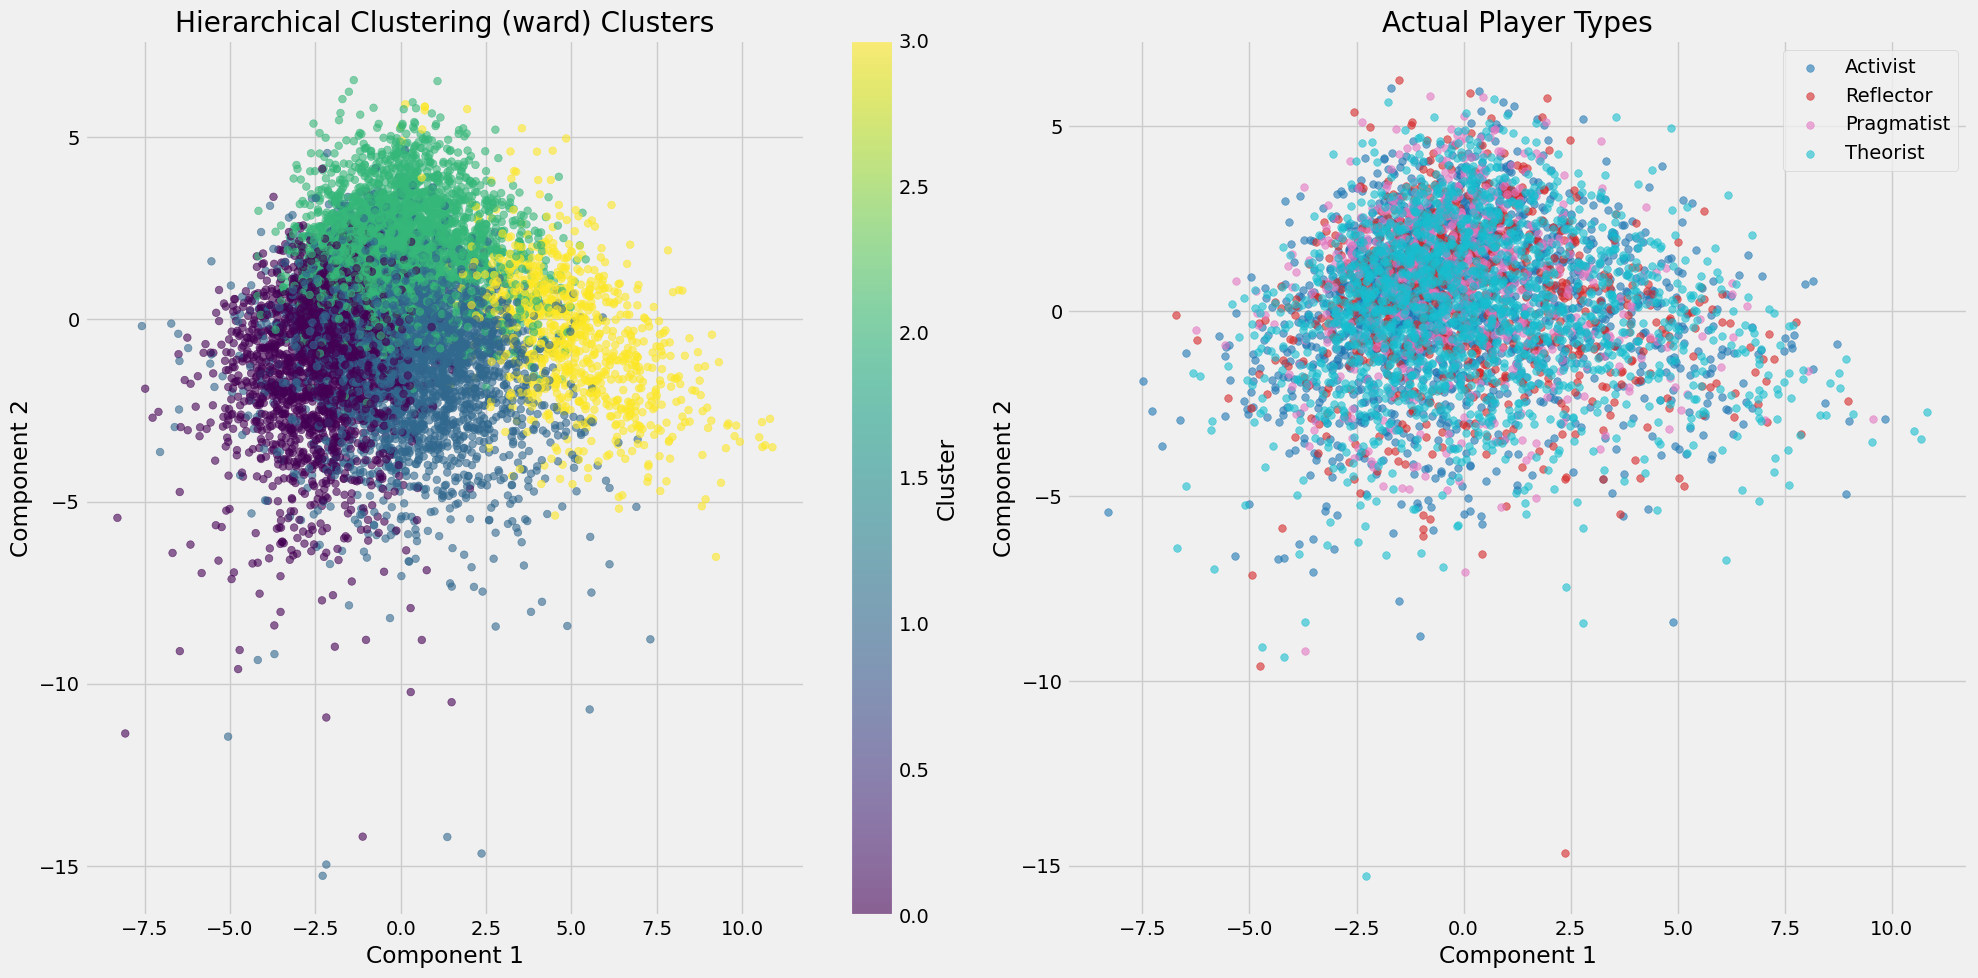


Hierarchical Clustering (ward) Evaluation:
Adjusted Rand Index: -0.0037
Normalized Mutual Information: 0.0043

Contingency Table:
col_0          0    1    2    3
player_type                    
Activist     400  608  603  145
Pragmatist   111  236  288   35
Reflector    156  251  280   75
Theorist     412  589  597  216
Cluster Purity: 0.3677

=== DBSCAN CLUSTERING ===


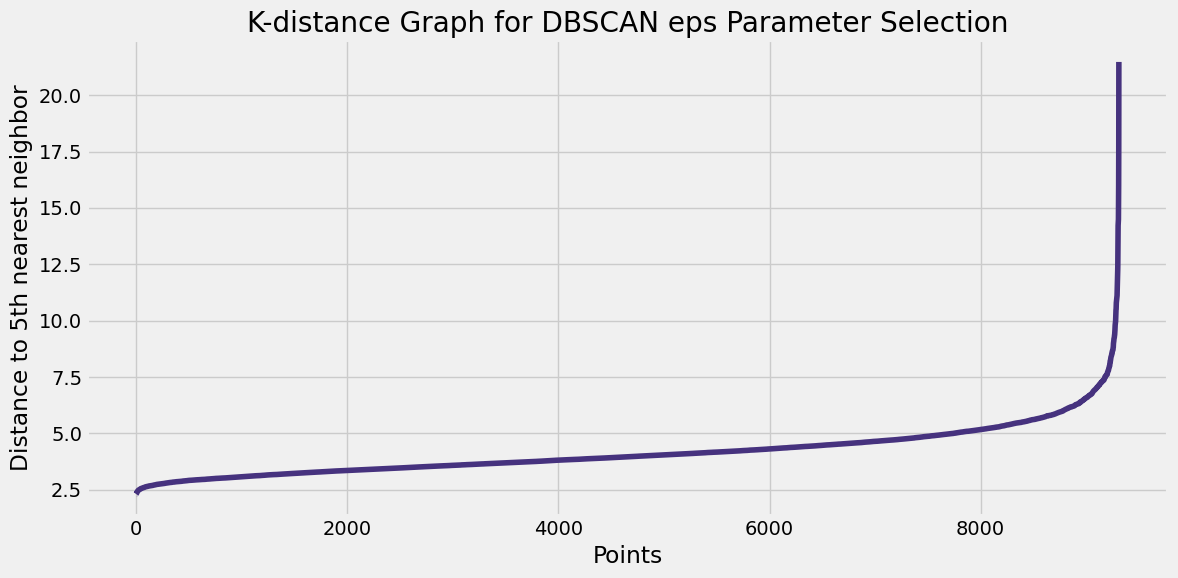

Optimal eps value based on knee detection: 7.3698
DBSCAN found 1 clusters and 86 noise points


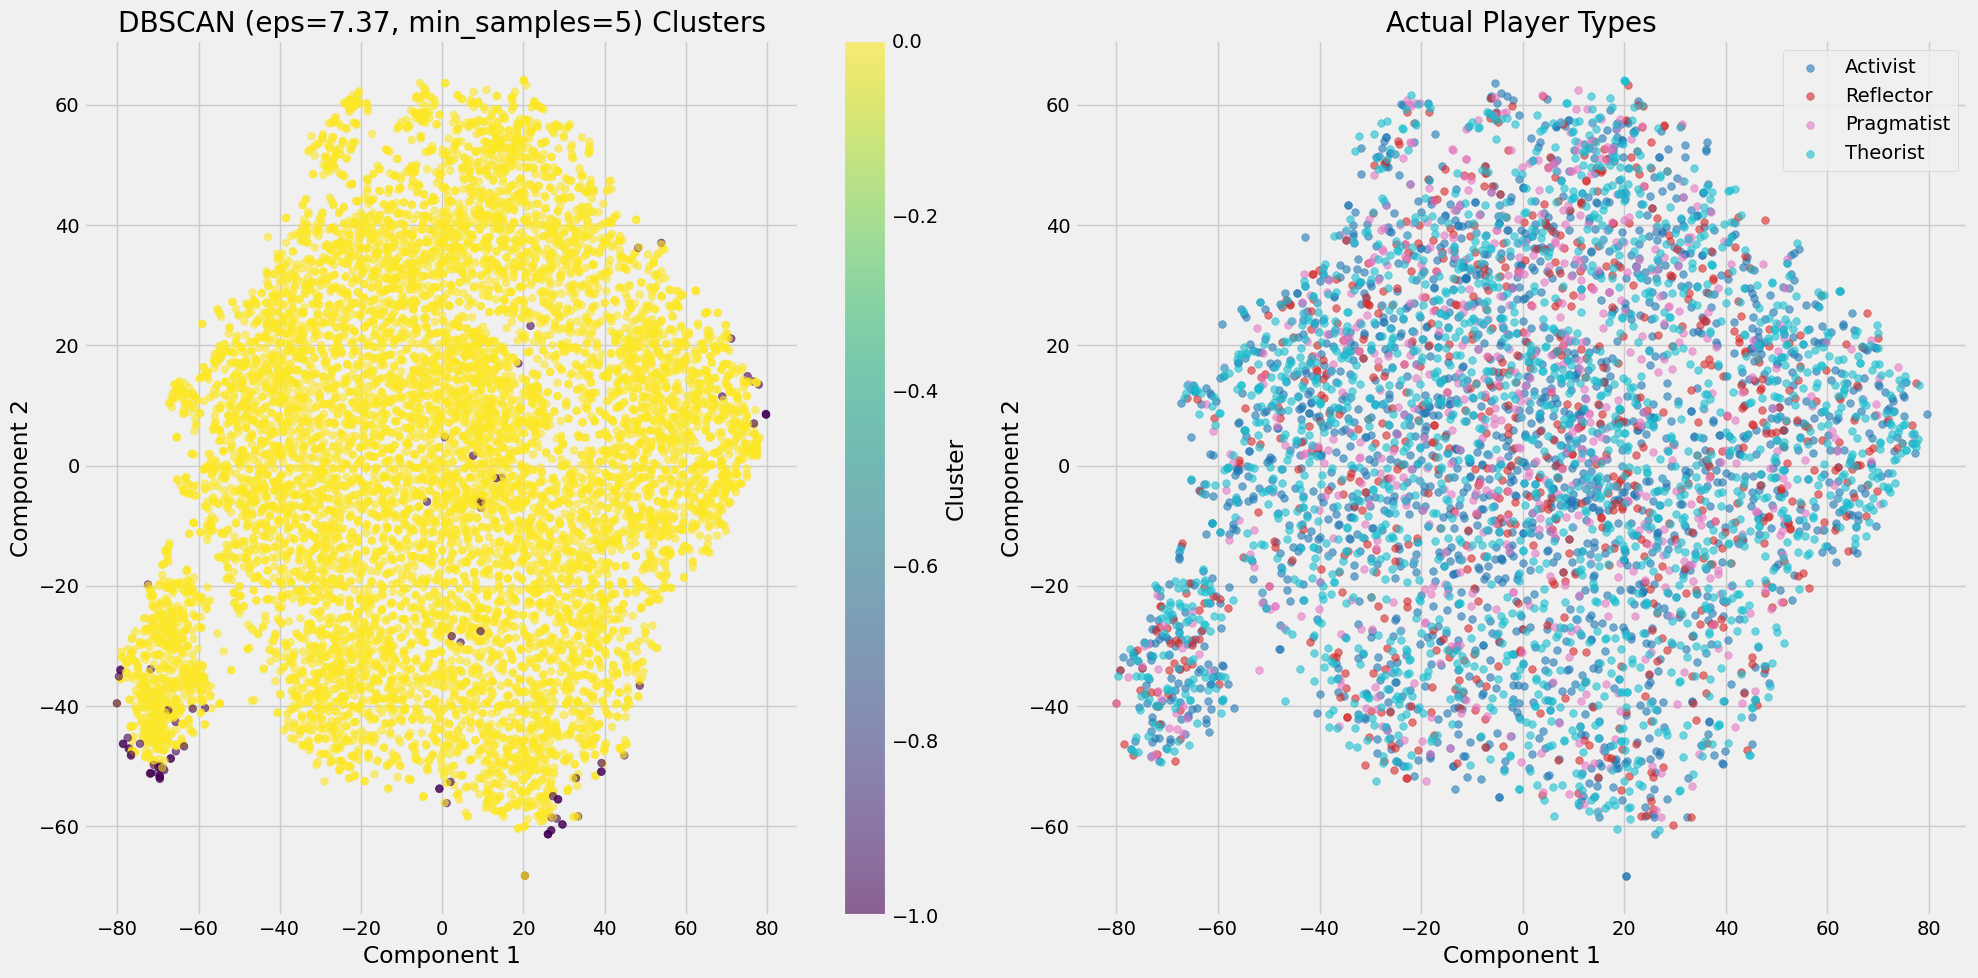


DBSCAN (eps=7.37) Evaluation:
Adjusted Rand Index: -0.0003
Normalized Mutual Information: 0.0004

Contingency Table:
col_0        -1     0
player_type          
Activist     11  1745
Pragmatist    3   667
Reflector     7   755
Theorist     17  1797
Cluster Purity: 0.3627

=== GAUSSIAN MIXTURE MODELING ===


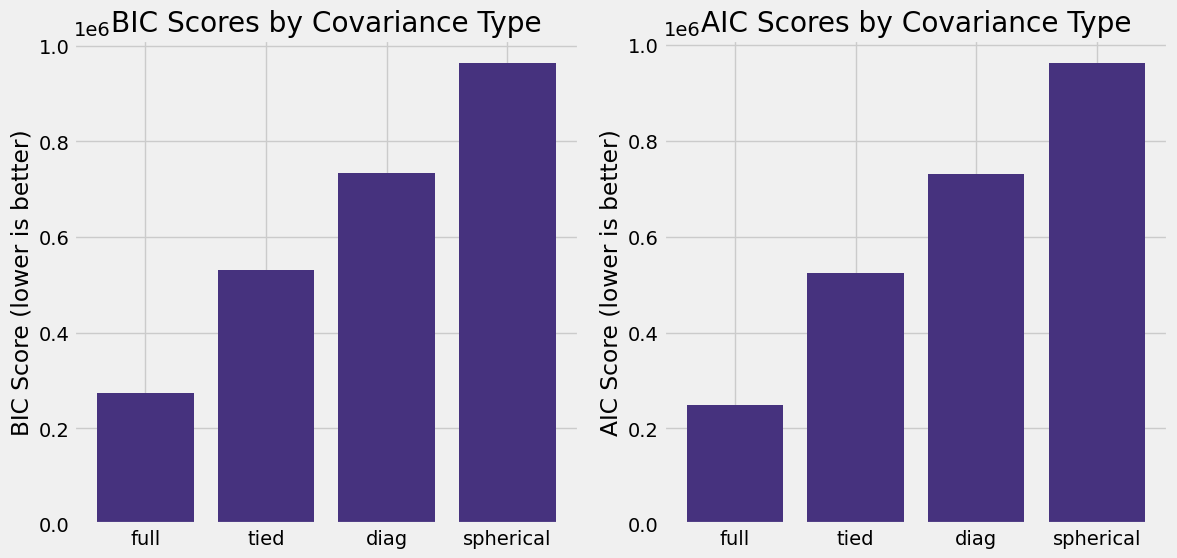

Best covariance type based on BIC: full


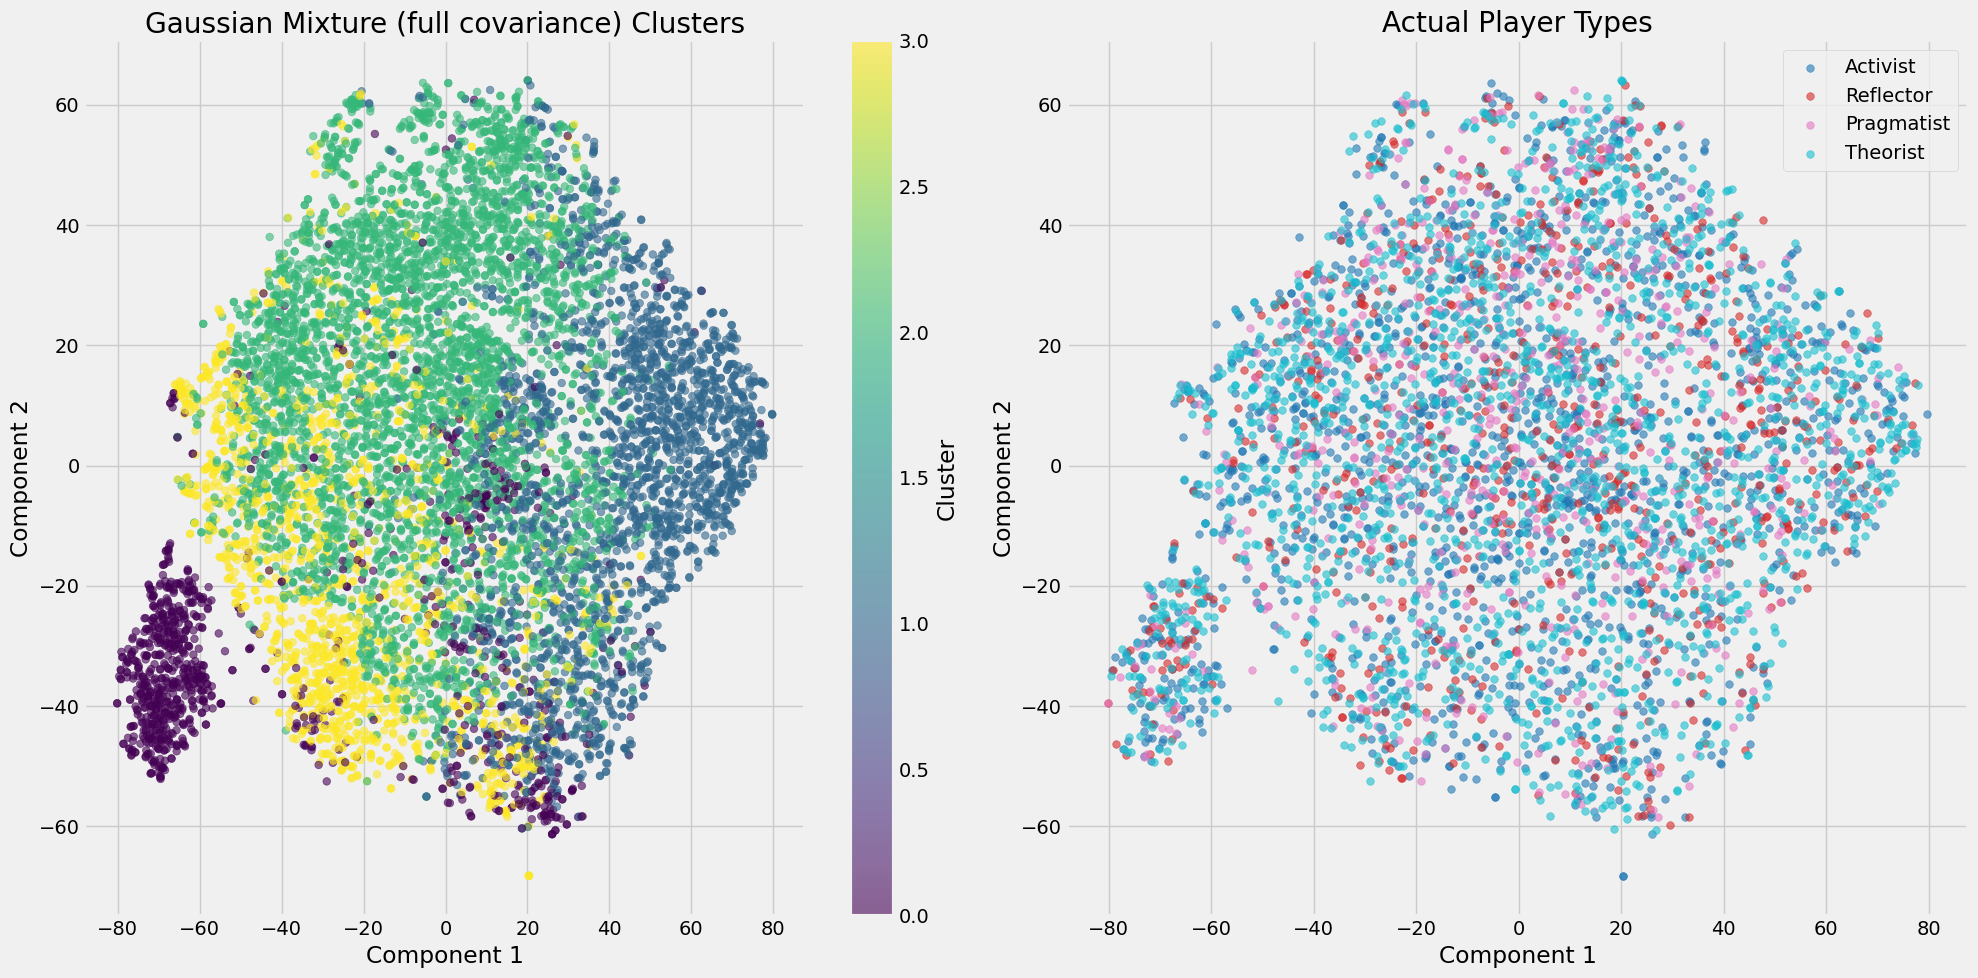


GMM (full) Evaluation:
Adjusted Rand Index: -0.0064
Normalized Mutual Information: 0.0040

Contingency Table:
col_0          0    1    2    3
player_type                    
Activist     192  421  848  295
Pragmatist    50  121  395  104
Reflector     82  204  379   97
Theorist     187  505  841  281
Cluster Purity: 0.3679

=== SPECTRAL CLUSTERING ===


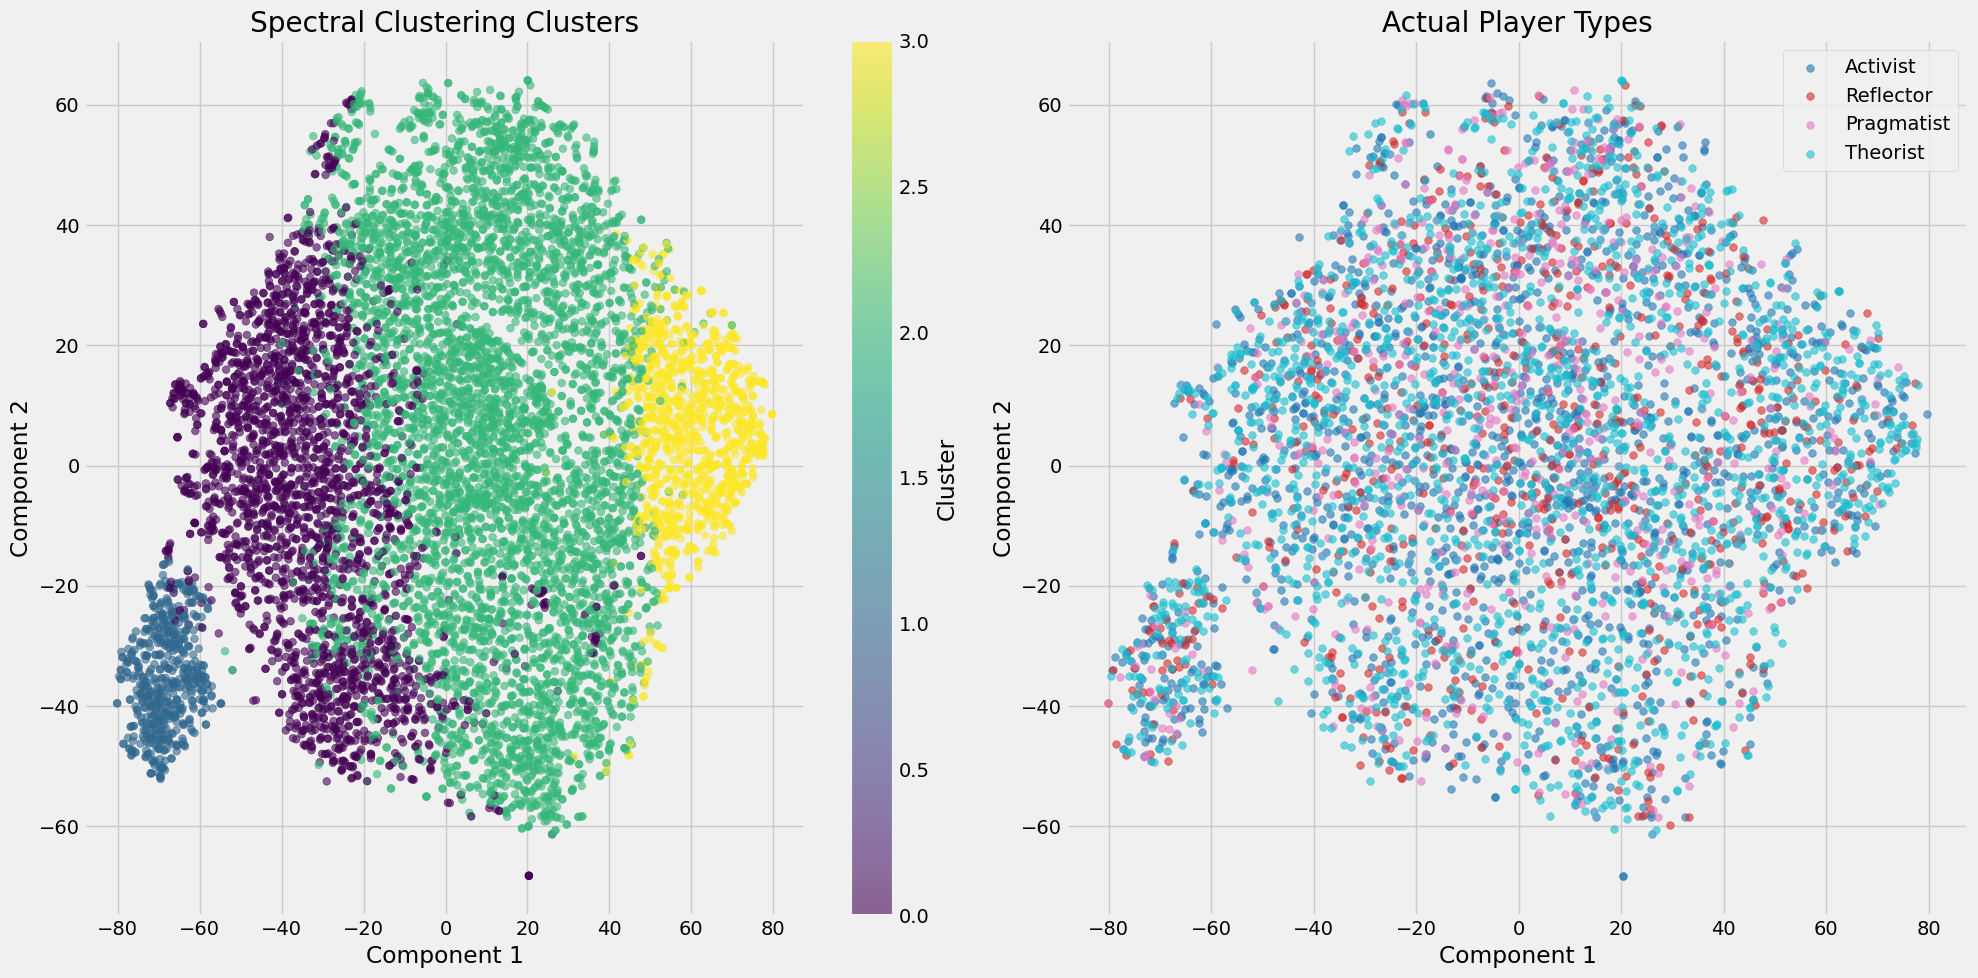


Spectral Clustering Evaluation:
Adjusted Rand Index: -0.0087
Normalized Mutual Information: 0.0043

Contingency Table:
col_0          0   1     2    3
player_type                    
Activist     498  94  1002  162
Pragmatist   161  24   447   38
Reflector    184  43   452   83
Theorist     489  90  1001  234
Cluster Purity: 0.3655

=== t-SNE + HDBSCAN CLUSTERING ===
HDBSCAN found 2 clusters and 1969 noise points


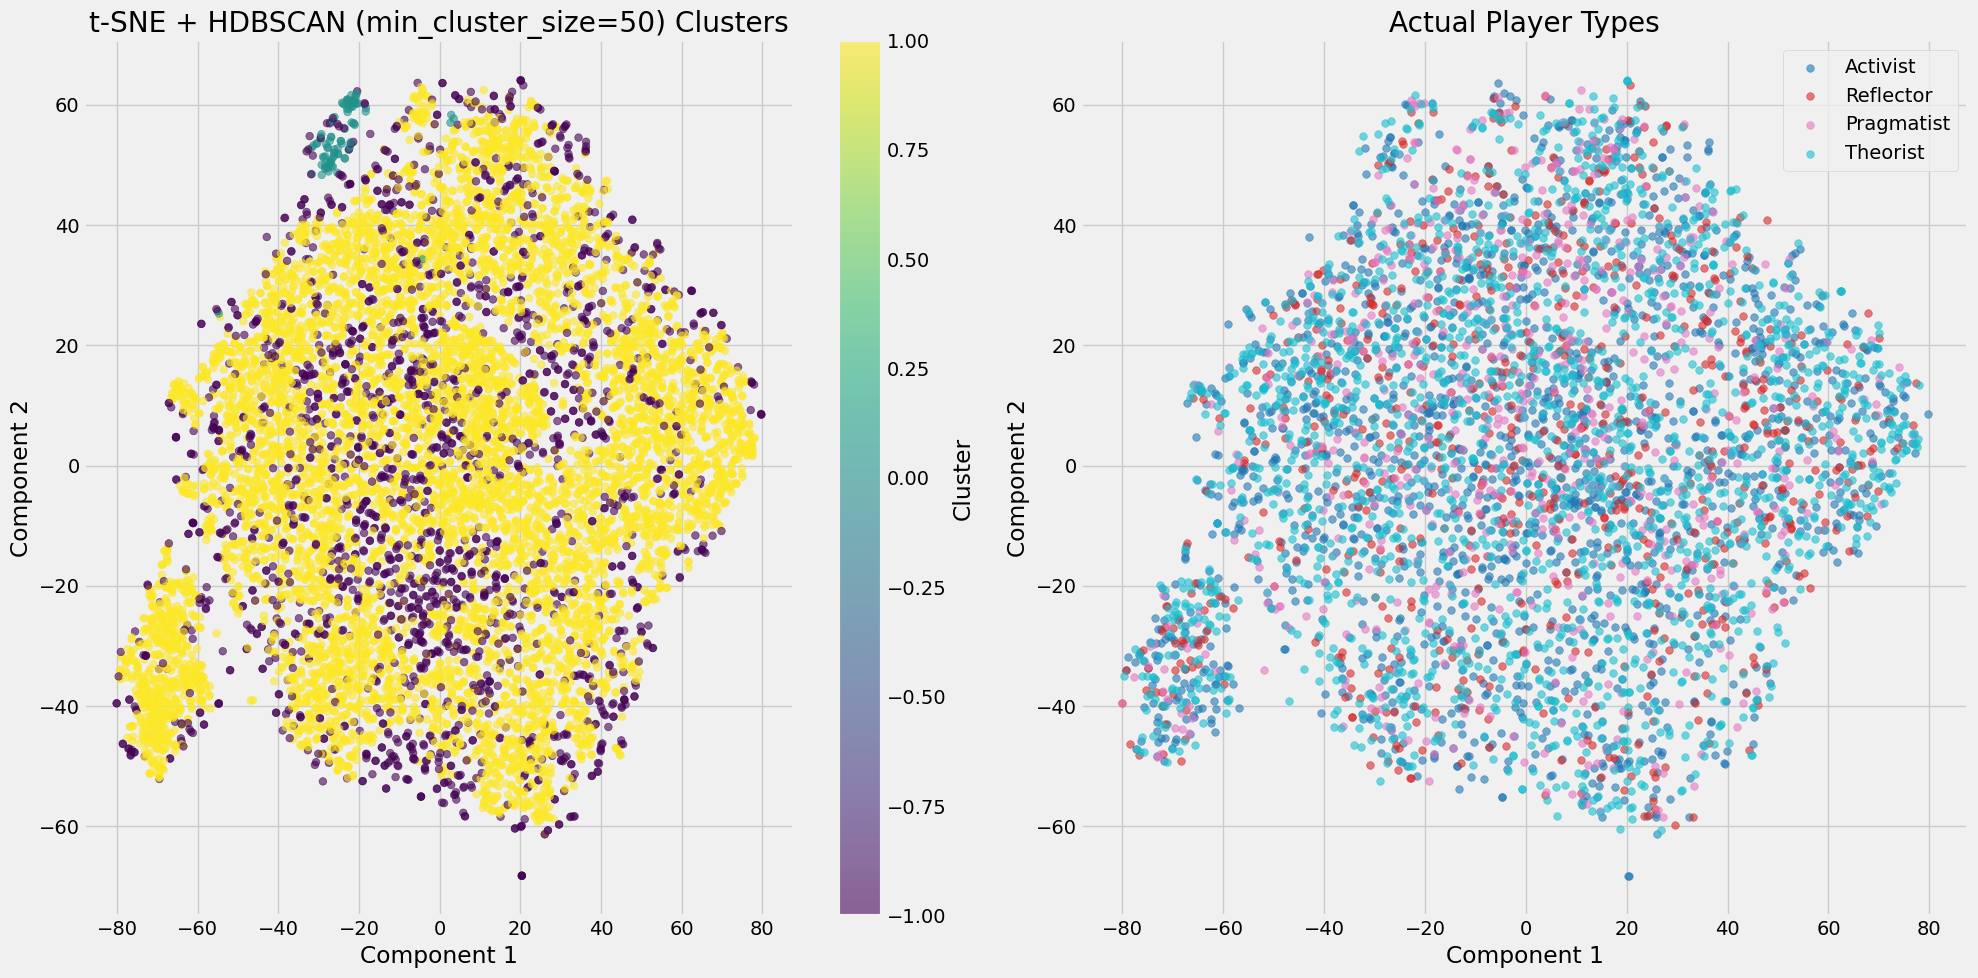


t-SNE + HDBSCAN Evaluation:
Adjusted Rand Index: -0.0021
Normalized Mutual Information: 0.0005

Contingency Table:
col_0         -1   0     1
player_type               
Activist     394  16  1346
Pragmatist   147   9   514
Reflector    146   9   607
Theorist     400  17  1397
Cluster Purity: 0.3627

=== SELF-ORGANIZING MAP ===
MiniSom package not installed. Please install with:
pip install minisom

=== FEATURE AGGLOMERATION + CLUSTERING ===
Reduced features from 40 to 10


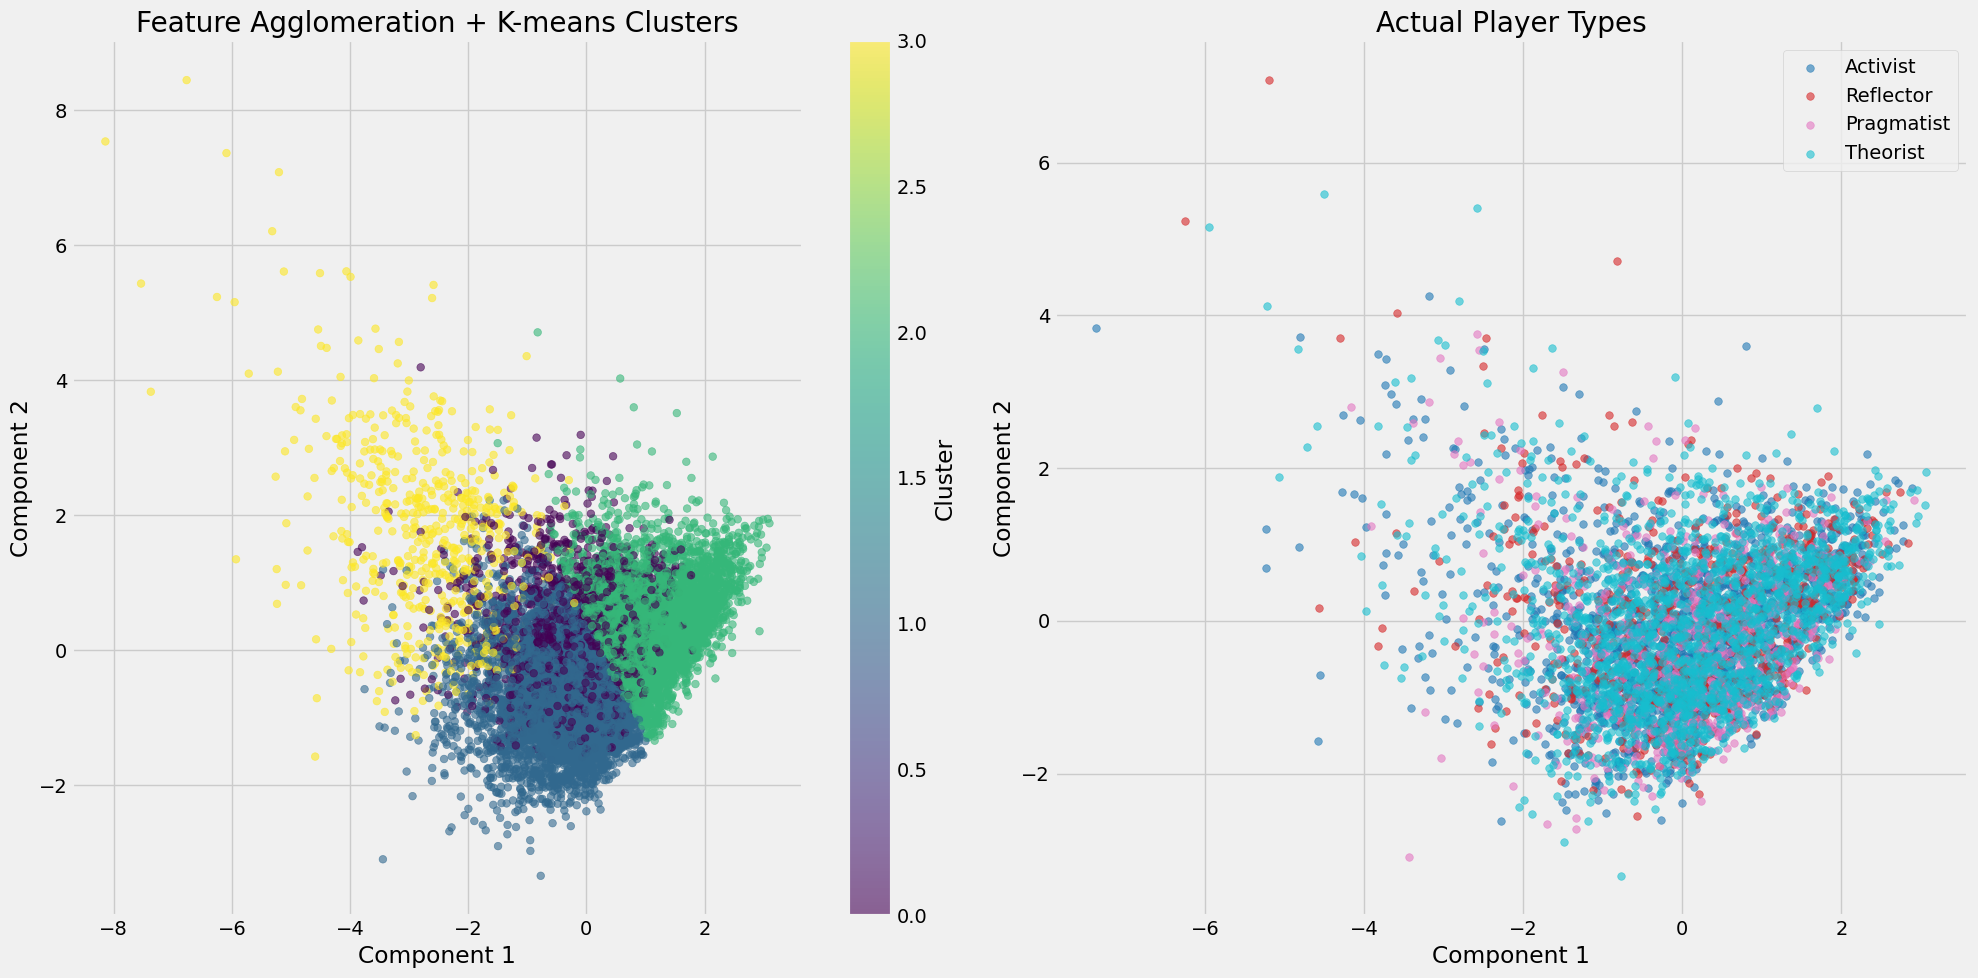


Feature Agglomeration + K-means Evaluation:
Adjusted Rand Index: -0.0003
Normalized Mutual Information: 0.0020

Contingency Table:
col_0          0    1    2   3
player_type                   
Activist     307  771  579  99
Pragmatist   119  322  205  24
Reflector    120  308  292  42
Theorist     279  762  676  97
Cluster Purity: 0.3705

=== CLUSTERING METHODS COMPARISON ===
                            Method       ARI       NMI    Purity
1   Hierarchical Clustering (ward) -0.003691  0.004348  0.367653
4              Spectral Clustering -0.008740  0.004347  0.365454
0                          K-means -0.002167  0.004198  0.373651
3                       GMM (full) -0.006368  0.003955  0.367853
6  Feature Agglomeration + K-means -0.000264  0.001987  0.370452
5                  t-SNE + HDBSCAN -0.002133  0.000507  0.362655
2                DBSCAN (eps=7.37) -0.000284  0.000359  0.362655


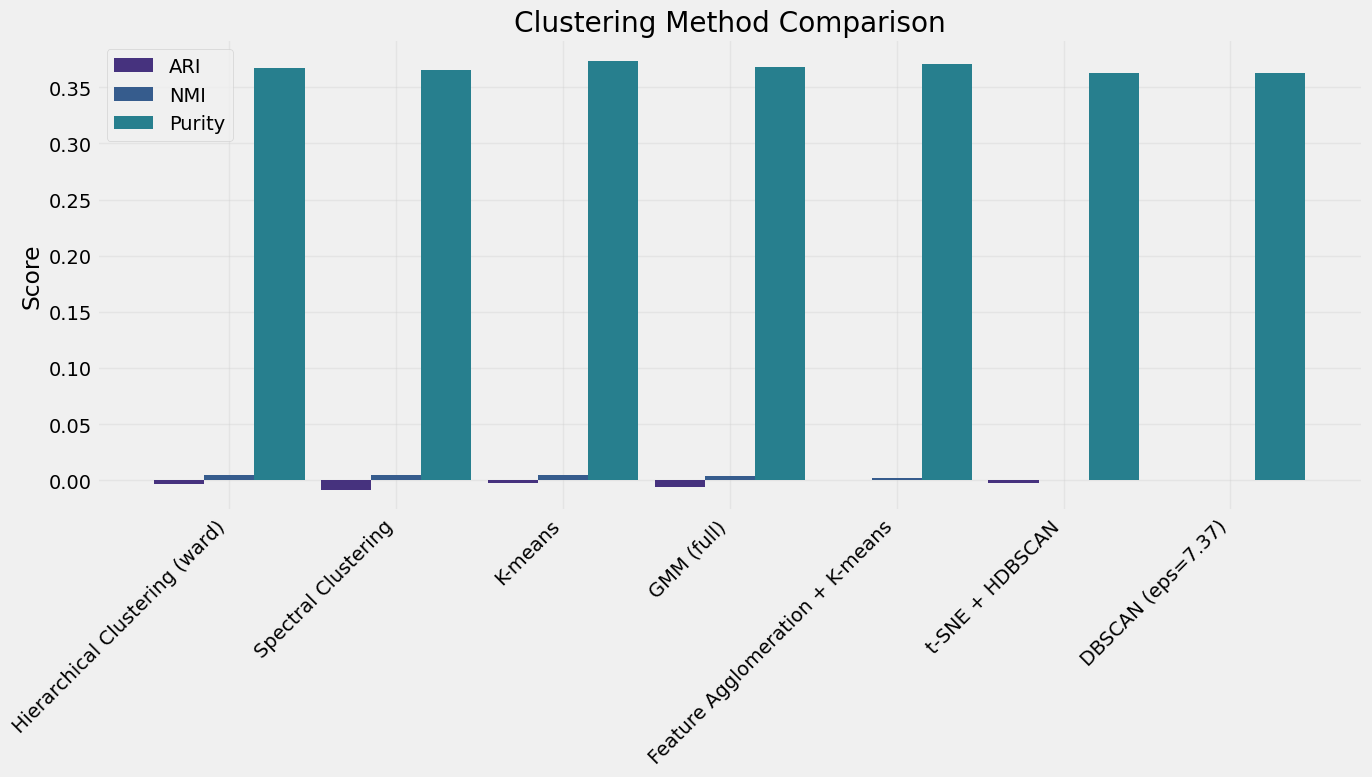

Analysis complete!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.impute import SimpleImputer
# Removing UMAP import since it's not available
import warnings
warnings.filterwarnings('ignore')

# Set the style for our plots
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)

# Function to load and preprocess the data
def load_data(file_path='player_centric_data.csv'):
    """Load and preprocess the chess player data"""
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Define known player types if needed
    activist_players = [
        "Alekhine, Alexander", "Tal, Mikhail", "Spassky, Boris V.", "Kasparov, G.",
        "Kasparov, Garry", "Anand, Viswanathan", "Anand,V", "Shirov, Alexei",
        "Morozevich, Alexander", "Topalov, Veselin", "Pillsbury, Harry",
        "Anderssen, Adolf", "Bronstein, David I", "Bronstein, Luis Marcos",
        "Larsen, B.", "Larsen, Bent", "Taimanov, Mark E", "Aronian, Levon",
        "Polgar, Judit", "Muller, K."
    ]
    theorist_players = [
        "Steinitz, Wilhelm", "Botvinnik, M.", "Kramnik, Vladimir", "Tarrasch, Siegbert",
        "Nimzowitsch, Aron", "Leko, Peter", "Giri, Anish", "Meier, Georg",
        "Andersson, Ulf", "Sedlak, Nikola", "Tiviakov, Sergei", "Ponomariov, Ruslan",
        "Wahls, Matthias", "Moskalenko, Viktor1", "Moskalenko, Viktor",
        "Moskalenko, V.", "Dorfman, Iossif", "Bangiev, Alexander", "Hansen, Lars Bo"
    ]
    reflector_players = [
        "Capablanca, Jose", "Smyslov, V.", "Petrosian, T.", "Karpov, A.",
        "Karpov, Anatoly", "Carlsen, Magnus", "Adams, Michael", "Keymer, Vincent",
        "Bischoff, K.", "Bischoff,K"
    ]
    pragmatist_players = [
        "Fischer, R.", "Euwe, Max", "Korchnoi, Viktor", "Caruana, Fabiano",
        "Ding, Liren", "Karjakin, Sergey", "Vachier-Lagrave, Maxime"
    ]
    
    return df

def get_features_and_types(df):
    """Extract features and player types from the dataframe"""
    # Define metadata columns to exclude from features
    metadata_cols = ['player_name', 'player_color', 'opponent_name', 'player_elo', 
                   'player_type', 'player_type_color', 'game_id', 'result']
    
    # Get numeric features
    numeric_features = [col for col in df.columns 
                      if col not in metadata_cols and pd.api.types.is_numeric_dtype(df[col])]
    
    # Get player types for labeled data
    player_types = df['player_type'].copy()
    
    # Create a clean dataset with imputed missing values
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(df[numeric_features]), columns=numeric_features)
    
    return X, player_types, numeric_features

def visualize_clusters(X_2d, labels, player_types=None, method_name='Clustering'):
    """Visualize clustering results in 2D with optional player type comparison"""
    plt.figure(figsize=(20, 10))
    
    # Plot clusters
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, s=30)
    plt.colorbar(scatter, label='Cluster')
    plt.title(f'{method_name} Clusters')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
    # Plot player types if available
    if player_types is not None:
        # Remove NaN values
        mask = ~player_types.isna()
        X_2d_labeled = X_2d[mask]
        types_labeled = player_types[mask]
        
        plt.subplot(1, 2, 2)
        unique_types = types_labeled.unique()
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_types)))
        
        for i, t in enumerate(unique_types):
            mask_t = (types_labeled == t)
            plt.scatter(X_2d_labeled[mask_t, 0], X_2d_labeled[mask_t, 1], 
                        c=[colors[i]], label=t, alpha=0.6, s=30)
        
        plt.title('Actual Player Types')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{method_name}_clusters.png', dpi=300)
    plt.show()

def evaluate_clustering(labels, player_types, method_name='Clustering'):
    """Calculate clustering metrics compared to known player types"""
    # Filter to only include labeled data points
    mask = ~player_types.isna()
    labels_labeled = labels[mask]
    types_labeled = player_types[mask]
    
    # Create contingency table
    contingency = pd.crosstab(types_labeled, labels_labeled)
    
    # Calculate metrics
    ari = adjusted_rand_score(types_labeled, labels_labeled)
    nmi = normalized_mutual_info_score(types_labeled, labels_labeled)
    
    print(f"\n{method_name} Evaluation:")
    print(f"Adjusted Rand Index: {ari:.4f}")
    print(f"Normalized Mutual Information: {nmi:.4f}")
    
    print("\nContingency Table:")
    print(contingency)
    
    # Calculate cluster purity
    purity = 0
    for i in range(contingency.shape[1]):
        purity += contingency.iloc[:, i].max()
    purity /= contingency.values.sum()
    print(f"Cluster Purity: {purity:.4f}")
    
    return {
        'method': method_name,
        'ari': ari,
        'nmi': nmi,
        'purity': purity,
        'contingency': contingency
    }

# Function to run PCA and visualize explained variance
def run_pca(X, n_components=None):
    """Run PCA and return transformed data"""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Plot explained variance
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_, alpha=0.7, color='skyblue')
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             np.cumsum(pca.explained_variance_ratio_), 
             'r-o', linewidth=2)
    plt.axhline(y=0.8, color='orange', linestyle='--', alpha=0.5)
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.title('PCA Explained Variance')
    plt.legend(['Cumulative Explained Variance', 'Individual Explained Variance', '80% Threshold'])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('pca_explained_variance.png', dpi=300)
    plt.show()
    
    return X_pca, pca

# 1. HIERARCHICAL CLUSTERING
def hierarchical_clustering(X, player_types=None, n_clusters=4, linkage='ward'):
    """Apply hierarchical clustering and visualize results"""
    print("\n=== HIERARCHICAL CLUSTERING ===")
    
    # Apply clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = clustering.fit_predict(X)
    
    # Apply PCA for visualization
    X_pca, _ = run_pca(X, n_components=2)
    
    # Visualize
    visualize_clusters(X_pca, labels, player_types, 
                      f"Hierarchical Clustering ({linkage})")
    
    # Evaluate if player types are available
    if player_types is not None:
        return evaluate_clustering(labels, player_types, 
                                 f"Hierarchical Clustering ({linkage})")
    
    return labels

# 2. DBSCAN CLUSTERING
def dbscan_clustering(X, player_types=None, eps=0.5, min_samples=5):
    """Apply DBSCAN clustering and visualize results"""
    print("\n=== DBSCAN CLUSTERING ===")
    
    # Find optimal eps value using nearest neighbors
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:, min_samples-1])
    
    # Plot k-distance graph
    plt.figure(figsize=(12, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'Distance to {min_samples}th nearest neighbor')
    plt.title('K-distance Graph for DBSCAN eps Parameter Selection')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('dbscan_kdistance.png', dpi=300)
    plt.show()
    
    # Find knee point in the curve for optimal eps
    from kneed import KneeLocator
    try:
        kneedle = KneeLocator(range(len(distances)), distances, 
                             S=1.0, curve='convex', direction='increasing')
        eps_optimal = distances[kneedle.knee]
        print(f"Optimal eps value based on knee detection: {eps_optimal:.4f}")
    except:
        print("Knee detection failed, using default eps value")
        eps_optimal = eps
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # Count number of clusters (excluding noise points)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"DBSCAN found {n_clusters} clusters and {(labels == -1).sum()} noise points")
    
    # Apply t-SNE for visualization
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
    
    # Visualize
    visualize_clusters(X_tsne, labels, player_types, 
                      f"DBSCAN (eps={eps_optimal:.2f}, min_samples={min_samples})")
    
    # Evaluate if player types are available
    if player_types is not None:
        return evaluate_clustering(labels, player_types, 
                                 f"DBSCAN (eps={eps_optimal:.2f})")
    
    return labels

# 3. GAUSSIAN MIXTURE MODELS
def gaussian_mixture_modeling(X, player_types=None, n_components=4):
    """Apply Gaussian Mixture Model clustering and visualize results"""
    print("\n=== GAUSSIAN MIXTURE MODELING ===")
    
    # Try different covariance types
    covariance_types = ['full', 'tied', 'diag', 'spherical']
    bic_scores = []
    aic_scores = []
    
    for cov_type in covariance_types:
        gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
        gmm.fit(X)
        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))
    
    # Plot BIC and AIC scores
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(covariance_types, bic_scores)
    plt.title('BIC Scores by Covariance Type')
    plt.ylabel('BIC Score (lower is better)')
    
    plt.subplot(1, 2, 2)
    plt.bar(covariance_types, aic_scores)
    plt.title('AIC Scores by Covariance Type')
    plt.ylabel('AIC Score (lower is better)')
    
    plt.tight_layout()
    plt.savefig('gmm_covariance_comparison.png', dpi=300)
    plt.show()
    
    # Find best covariance type
    best_cov_type = covariance_types[np.argmin(bic_scores)]
    print(f"Best covariance type based on BIC: {best_cov_type}")
    
    # Apply GMM with best covariance type
    gmm = GaussianMixture(n_components=n_components, covariance_type=best_cov_type, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    
    # Apply t-SNE for visualization instead of UMAP
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
    
    # Visualize
    visualize_clusters(X_tsne, labels, player_types, 
                      f"Gaussian Mixture ({best_cov_type} covariance)")
    
    # Evaluate if player types are available
    if player_types is not None:
        return evaluate_clustering(labels, player_types, 
                                 f"GMM ({best_cov_type})")
    
    return labels

# 4. SPECTRAL CLUSTERING
def spectral_clustering(X, player_types=None, n_clusters=4):
    """Apply Spectral Clustering and visualize results"""
    print("\n=== SPECTRAL CLUSTERING ===")
    
    # Apply Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(X)
    
    # Apply t-SNE for visualization instead of UMAP
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
    
    # Visualize
    visualize_clusters(X_tsne, labels, player_types, "Spectral Clustering")
    
    # Evaluate if player types are available
    if player_types is not None:
        return evaluate_clustering(labels, player_types, "Spectral Clustering")
    
    return labels

# 5. UMAP + HDBSCAN - Modified to use t-SNE instead of UMAP
def tsne_hdbscan_clustering(X, player_types=None, min_cluster_size=50, min_samples=10):
    """Apply t-SNE dimensionality reduction followed by HDBSCAN clustering"""
    print("\n=== t-SNE + HDBSCAN CLUSTERING ===")
    try:
        import hdbscan
    except ImportError:
        print("HDBSCAN package not installed. Please install with:")
        print("pip install hdbscan")
        return None
    
    # Apply t-SNE for dimensionality reduction
    tsne_reducer = TSNE(
        n_components=3,
        random_state=42,
    )
    X_tsne = tsne_reducer.fit_transform(X)
    
    # Apply HDBSCAN on the t-SNE embedding
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        gen_min_span_tree=True,
        prediction_data=True
    )
    labels = clusterer.fit_predict(X_tsne)
    
    # Count number of clusters (excluding noise points)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"HDBSCAN found {n_clusters} clusters and {(labels == -1).sum()} noise points")
    
    # Apply t-SNE for visualization (2D)
    X_tsne_2d = TSNE(n_components=2, random_state=42).fit_transform(X)
    
    # Visualize
    visualize_clusters(X_tsne_2d, labels, player_types, 
                      f"t-SNE + HDBSCAN (min_cluster_size={min_cluster_size})")
    
    # Evaluate if player types are available
    if player_types is not None:
        return evaluate_clustering(labels, player_types, 
                                 f"t-SNE + HDBSCAN")
    
    return labels

# 6. SELF-ORGANIZING MAP
def self_organizing_map(X, player_types=None, map_size=(10, 10)):
    """Apply Self-Organizing Map for clustering"""
    print("\n=== SELF-ORGANIZING MAP ===")
    try:
        from minisom import MiniSom
    except ImportError:
        print("MiniSom package not installed. Please install with:")
        print("pip install minisom")
        return None
    
    # Normalize data for SOM
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Initialize and train SOM
    som = MiniSom(map_size[0], map_size[1], X_scaled.shape[1], 
                 sigma=1.0, learning_rate=0.5, random_seed=42)
    som.train_random(X_scaled, 10000)
    
    # Get BMU (Best Matching Unit) for each data point
    bmu_coordinates = np.array([som.winner(x) for x in X_scaled])
    
    # Convert BMU coordinates to cluster labels
    # We'll use the BMU coordinates as a 2D position and create a unique label for each
    labels = np.ravel_multi_index(bmu_coordinates.T, map_size)
    
    # Count number of clusters
    n_clusters = len(np.unique(labels))
    print(f"SOM found {n_clusters} clusters")
    
    # Apply t-SNE for visualization
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
    
    # Visualize
    visualize_clusters(X_tsne, labels, player_types, 
                      f"Self-Organizing Map {map_size[0]}x{map_size[1]}")
    
    # Evaluate if player types are available
    if player_types is not None:
        return evaluate_clustering(labels, player_types, 
                                 f"SOM {map_size[0]}x{map_size[1]}")
    
    return labels, som, bmu_coordinates

# 7. FEATURE AGGLOMERATION + CLUSTERING
def feature_agglomeration_clustering(X, player_types=None, n_clusters=4):
    """Apply Feature Agglomeration for feature reduction followed by clustering"""
    print("\n=== FEATURE AGGLOMERATION + CLUSTERING ===")
    from sklearn.cluster import FeatureAgglomeration
    
    # Apply Feature Agglomeration to reduce dimensionality
    n_features = min(10, X.shape[1])
    agglomeration = FeatureAgglomeration(n_clusters=n_features)
    X_reduced = agglomeration.fit_transform(X)
    
    print(f"Reduced features from {X.shape[1]} to {X_reduced.shape[1]}")
    
    # Apply K-means on reduced features
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_reduced)
    
    # Apply PCA for visualization
    X_pca = PCA(n_components=2).fit_transform(X_reduced)
    
    # Visualize
    visualize_clusters(X_pca, labels, player_types, 
                      f"Feature Agglomeration + K-means")
    
    # Evaluate if player types are available
    if player_types is not None:
        return evaluate_clustering(labels, player_types, 
                                 f"Feature Agglomeration + K-means")
    
    return labels

# 8. RUN ALL METHODS AND COMPARE
def run_all_clustering_methods(X, player_types=None, n_clusters=4):
    """Run all clustering methods and compare results"""
    print("\n=== RUNNING ALL CLUSTERING METHODS ===")
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    results = []
    
    # 1. K-means (baseline)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    if player_types is not None:
        kmeans_results = evaluate_clustering(kmeans_labels, player_types, "K-means")
        results.append(kmeans_results)
    
    # 2. Hierarchical Clustering
    hierarchical_results = hierarchical_clustering(X_scaled, player_types, n_clusters)
    if player_types is not None:
        results.append(hierarchical_results)
    
    # 3. DBSCAN
    dbscan_results = dbscan_clustering(X_scaled, player_types)
    if player_types is not None:
        results.append(dbscan_results)
    
    # 4. Gaussian Mixture Models
    gmm_results = gaussian_mixture_modeling(X_scaled, player_types, n_clusters)
    if player_types is not None:
        results.append(gmm_results)
    
    # 5. Spectral Clustering
    spectral_results = spectral_clustering(X_scaled, player_types, n_clusters)
    if player_types is not None:
        results.append(spectral_results)
    
    # 6. t-SNE + HDBSCAN (replacing UMAP + HDBSCAN)
    try:
        tsne_hdbscan_results = tsne_hdbscan_clustering(X_scaled, player_types)
        if player_types is not None and tsne_hdbscan_results is not None:
            results.append(tsne_hdbscan_results)
    except:
        print("t-SNE + HDBSCAN clustering failed. Skipping...")
    
    # 7. Self-Organizing Map
    try:
        som_results = self_organizing_map(X_scaled, player_types)
        if player_types is not None and som_results is not None:
            if isinstance(som_results, tuple):
                # Unpack if multiple outputs
                labels, som, bmu_coordinates = som_results
                som_eval = evaluate_clustering(labels, player_types, "Self-Organizing Map")
                results.append(som_eval)
            else:
                results.append(som_results)
    except:
        print("Self-Organizing Map clustering failed. Skipping...")
    
    # 8. Feature Agglomeration
    fa_results = feature_agglomeration_clustering(X_scaled, player_types, n_clusters)
    if player_types is not None:
        results.append(fa_results)
    
    # Compare results
    if player_types is not None and results:
        print("\n=== CLUSTERING METHODS COMPARISON ===")
        comparison_df = pd.DataFrame([{
            'Method': r['method'],
            'ARI': r['ari'],
            'NMI': r['nmi'],
            'Purity': r['purity']
        } for r in results])
        
        comparison_df = comparison_df.sort_values('NMI', ascending=False)
        print(comparison_df)
        
        # Plot comparison
        plt.figure(figsize=(14, 8))
        
        ax1 = plt.subplot(1, 1, 1)
        x = np.arange(len(comparison_df))
        width = 0.3
        
        ax1.bar(x - width, comparison_df['ARI'], width, label='ARI')
        ax1.bar(x, comparison_df['NMI'], width, label='NMI')
        ax1.bar(x + width, comparison_df['Purity'], width, label='Purity')
        
        ax1.set_xticks(x)
        ax1.set_xticklabels(comparison_df['Method'], rotation=45, ha='right')
        ax1.set_ylabel('Score')
        ax1.set_title('Clustering Method Comparison')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('clustering_comparison.png', dpi=300)
        plt.show()
        
        return comparison_df
    
    return None

# Run the entire pipeline if called directly
if __name__ == "__main__":
    # Load data
    df = load_data()
    
    # Extract features and player types
    X, player_types, feature_names = get_features_and_types(df)
    
    # Run all clustering methods
    comparison = run_all_clustering_methods(X, player_types, n_clusters=4)
    
    print("Analysis complete!")